# Introduction

### A Dataset containing comments, likes(on comments) and replies(on comments) of a particular Youtube video is given. Various types of data analysis such as: sentiment analysis, wordcloud analysis, emoji analysis & correlation analysis are performed on this dataset.

# Importing relevant libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [9]:
comments=pd.read_csv(r'D:\Data Analysis\UScomments.csv', error_bad_lines=False)

C:\Users\ankit\AppData\Local\Temp\ipykernel_17936\2476687458.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\ankit\AppData\Local\Temp\ipykernel_17936\2476687458.py:1: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



# Data Info

In [10]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [11]:
comments.shape

(691400, 4)

In [72]:
comments.dtypes

video_id         object
comment_text     object
likes            object
replies          object
polarity        float64
dtype: object

# Data Cleaning

In [12]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [13]:
comments.dropna(inplace=True)

In [14]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [82]:
comments['likes'] = pd.to_numeric(comments['likes'], errors='coerce').fillna(0).astype(int)
comments['replies'] = pd.to_numeric(comments['replies'], errors='coerce').fillna(0).astype(int)

In [83]:
comments.dtypes

video_id         object
comment_text     object
likes             int32
replies           int32
polarity        float64
dtype: object

# Sentiment Analysis

### Objective: To determine the polarity(positive,negative or neutral) of comments on a YouTube video

In [15]:
from textblob import TextBlob

In [16]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [17]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [18]:
comments['polarity']=polarity

In [19]:
comments.sort_values(by='polarity',ascending=False)

,video_id,comment_text,likes,replies,polarity
552736,R1ZXOOLMJ8s,The best trailer of this year,0,0,1.0
455830,Ca3rEOlAfpc,Make mooncakes :D,0,0,1.0
233287,UdHopftQD3A,Lindo ♥,0,0,1.0
455822,Ca3rEOlAfpc,Level up custard!!! :D :D,1,0,1.0
579589,PgeJ0XYuI2E,"Superb breakdown, informative and balanced.",0,0,1.0
...,...,...,...,...,...
590247,W-8nCyXm03E,Terrible video!!,0,0,-1.0
398719,Ri4xPHGS5f8,DID O.J. SIMPSON shoot up the VEGAS STRIP? 'FA...,0,0,-1.0
404599,6l5P7jHUcjI,She’s a fucking boss!! Ate 20 patties like a c...,0,0,-1.0
275486,e4HRUcyMvZY,what a boring sport,8,36,-1.0


In [20]:
filter1=comments['polarity']==1
comments_positive=comments[filter1]

In [21]:
filter2=comments['polarity']==-1
comments_negative=comments[filter2]

In [22]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [23]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


# Wordcloud Analysis

### Objective: To generate visual depictions of positive and negatuve words used in comments of a YouTube video.

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
type(comments['comment_text'])

pandas.core.series.Series

In [91]:
total_comments_positive=' '.join(comments_positive['comment_text'])

In [28]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

Text(0.5, 1.0, 'Positive words')

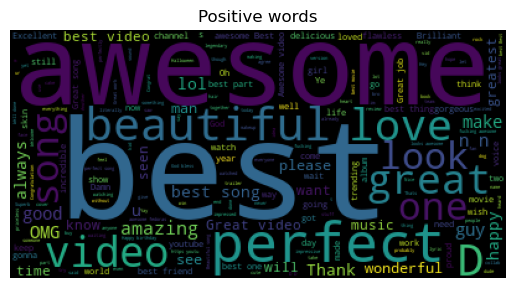

In [51]:
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Positive words')

In [30]:
total_comments_negative=' '.join(comments_negative['comment_text'])

In [31]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

Text(0.5, 1.0, 'Negative words')

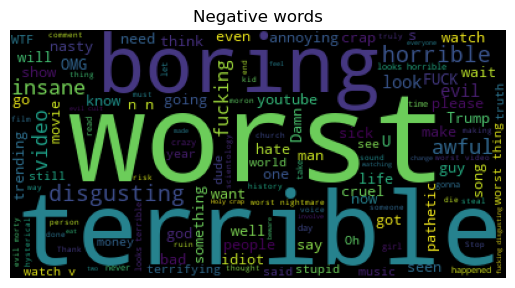

In [32]:
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Negative words')

# Emoji Analysis

### Objective: To determine the top 10 Emojis used in the comments of a YouTube video.

In [33]:
import emoji

In [34]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [35]:
emoji_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [36]:
len(emoji_list)

294549

In [39]:
from collections import Counter

In [99]:
emoji_count=Counter(emoji_list).most_common(10)
emoji_count

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [125]:
emojis = [item[0] for item in emoji_count]
counts = [item[1] for item in emoji_count]

In [138]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace=go.Bar(x=emojis, y=counts)
iplot([trace])

# Correlation Analysis

### Objective: To study the correlation between numeric variables namely: likes, replies and polarity.

In [84]:
comments.corr(numeric_only=True)

,likes,replies,polarity
likes,1.000000,0.718511,0.000005
replies,0.718511,1.000000,0.002405
polarity,0.000005,0.002405,1.000000


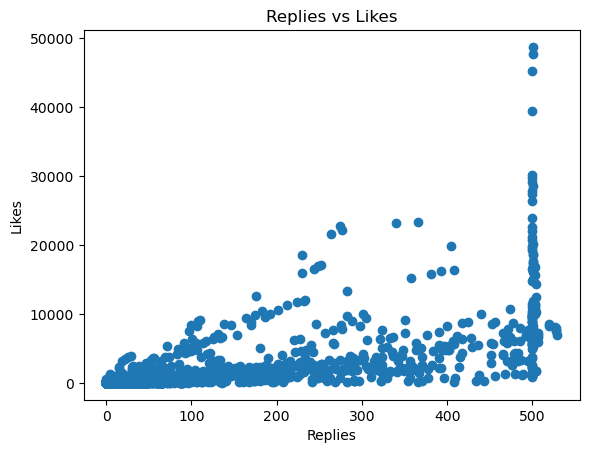

In [86]:
plt.scatter(x=comments['replies'], y=comments['likes'])
plt.title('Replies vs Likes')
plt.xlabel('Replies')
plt.ylabel('Likes')
plt.show()

<Axes: xlabel='replies', ylabel='likes'>

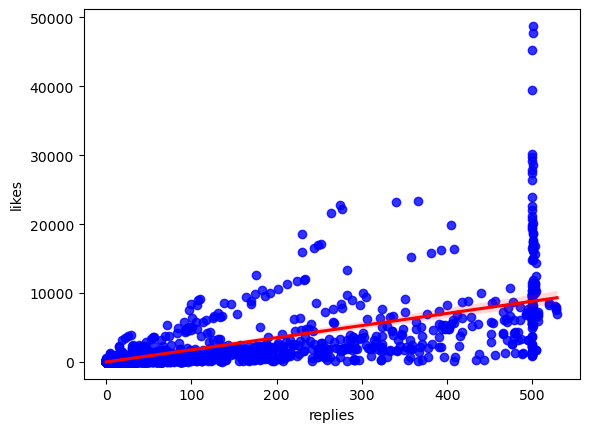

In [87]:
sns.regplot(x='replies',y='likes',data=comments,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

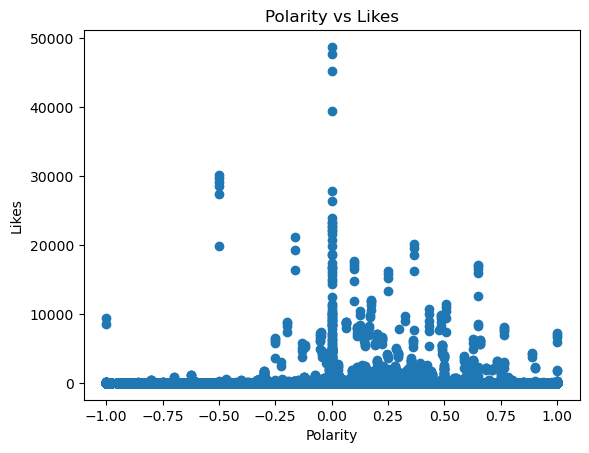

In [88]:
plt.scatter(x=comments['polarity'], y=comments['likes'])
plt.title('Polarity vs Likes')
plt.xlabel('Polarity')
plt.ylabel('Likes')
plt.show()

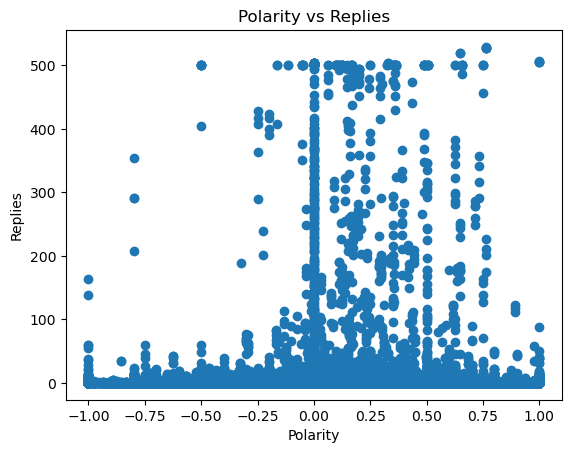

In [89]:
plt.scatter(x=comments['polarity'], y=comments['replies'])
plt.title('Polarity vs Replies')
plt.xlabel('Polarity')
plt.ylabel('Replies')
plt.show()

### Inferences: 

### 1. The number of likes and number of replies on a youtube video's comments are highly correlated.
### 2. There is no correlation between polarity and number of likes.
### 3. There is no correlation between polarity and number of replies.